# Python. Mini-project 2


1. Import the pandas library as pd. Download two datasets user_data and logs. Check table size, variable types, missing values, descriptive statistics.

2. Which client has made the most successful transactions? (success==True)

3. Which platform has the highest number of successful transactions?

4. Which platform do premium customers prefer?

5. Visualize the age distribution of customers depending on the type of customer (premium or not)

6. Plot the distribution of the number of successful operations

7. Visualize the number of successful operations made on the computer platform as a function of age using sns.countplot (x is age, y is the number of successful operations). What age group of clients had the highest number of successful actions?

### Data Description
**user_data:**

- client - user ID
- premium - whether the client is a premium
-age - age

**logs:**

- client - user ID
- success - result (success - 1, no - 0)
- platform - platform
- time - time in Unix format

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Task 1

Import the pandas library as pd. Download two datasets user_data and logs.
Check table size, variable types, look at descriptive statistics.

Question: How many unique values ​​does the platform variable take?

In [49]:
# table with unique user ids
df_users = pd.read_csv('./3_user_data.csv')
df_users.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [50]:
df_log = pd.read_csv('./3_logs.csv')
df_log.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [51]:
df_users.shape

(2954, 3)

In [52]:
df_log.shape

(4500, 4)

In [53]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


In [54]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   client    4500 non-null   int64 
 1   success   4500 non-null   bool  
 2   platform  4500 non-null   object
 3   time      4500 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 110.0+ KB


In [55]:
# descriptive statistics

df_log.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [56]:
df_users.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [57]:
df_log['platform'].unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [58]:
# How many unique values ​​does the platform variable take?
df_log['platform'].nunique()

3

# Task 2


Which client has made the most successful transactions?

If several users have completed the same number of successful actions,
list their identifiers (client) separated by commas and spaces in ascending order.

In [59]:
success_count = df_log.loc[df_log.success == True].client.value_counts()

In [60]:
success_count

28719    41
52870    41
61468    41
61473    41
12179    41
         ..
70028     1
37123     1
73522     1
38359     1
40921     1
Name: client, Length: 2845, dtype: int64

In [61]:
max_success = success_count.max()

In [62]:
max_success_users = success_count.loc[success_count == max_success]
max_success_users

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
Name: client, dtype: int64

In [63]:
#list ids
max_success_users.index.sort_values()

Int64Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64')

# Task 3
Which platform has the highest number of successful transactions?


In [64]:
df_log.loc[df_log.success == True].platform.value_counts().idxmax()

'phone'

In [65]:
df_log.loc[df_log.success == True].platform.value_counts().max()

2019

# Task 4
Which platform is most popular among premium customers?


In [66]:
general_df = df_log.merge(df_users, on='client')
general_df.head(5)

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [67]:
general_df.loc[general_df.premium == True].platform.value_counts().idxmax()

'phone'

# Task 5

Visualize the age distribution of customers depending on the type of customer (regular or premium),
using the seaborn library with default color options.

C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_34236\33737216.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(general_df.query('premium == False').age)
C:\Users\Ann Zalivatskaya\AppData\Local\Temp\ipykernel_34236\33737216.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(general_df

<Axes: xlabel='age', ylabel='Density'>

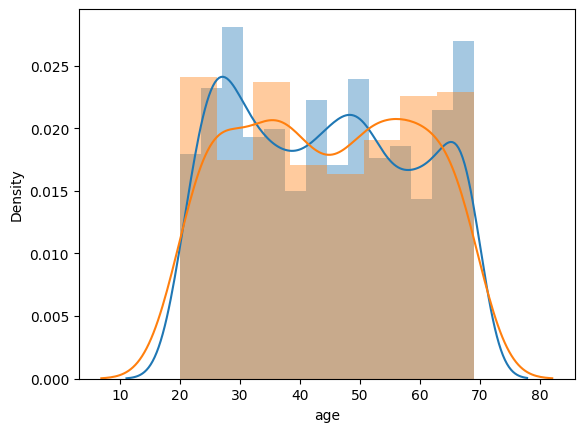

In [68]:
sns.distplot(general_df.query('premium == False').age)
sns.distplot(general_df.query('premium == True').age)

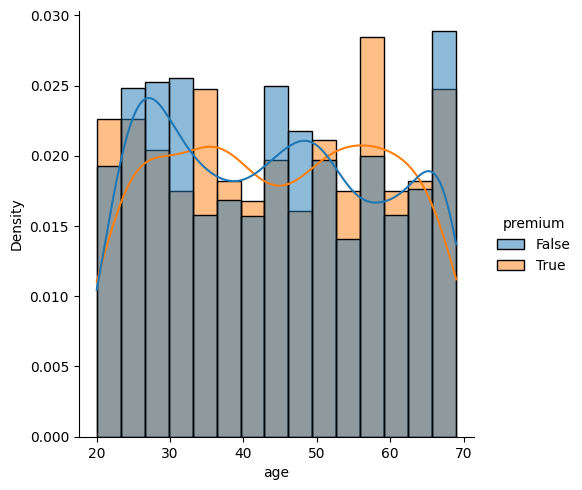

In [69]:
sns.displot(data=general_df, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False)

# Task 6
Plot the distribution of the number of successful operations:

- x – number of successful operations
- y - the number of clients who have made so many successful transactions

In [70]:
success_count = df_log.loc[df_log.success == True].client.value_counts()

In [71]:
success_count = success_count.rename('successes')

<Axes: xlabel='successes', ylabel='count'>

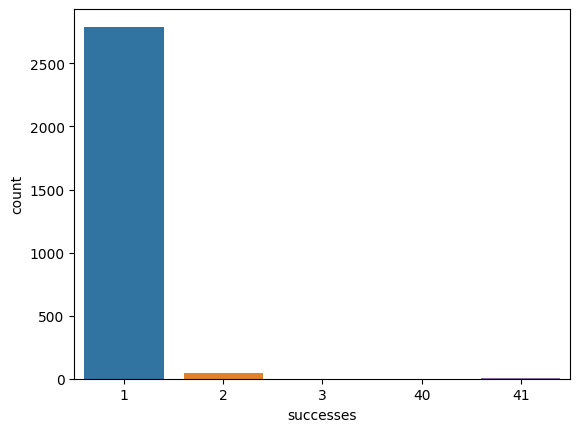

In [72]:
sns.countplot(x=success_count)

# Task 7
Visualize the number of successful operations done on the computer platform as a function of age using sns.countplot. On the x-axis - age, y - the number of successful operations.

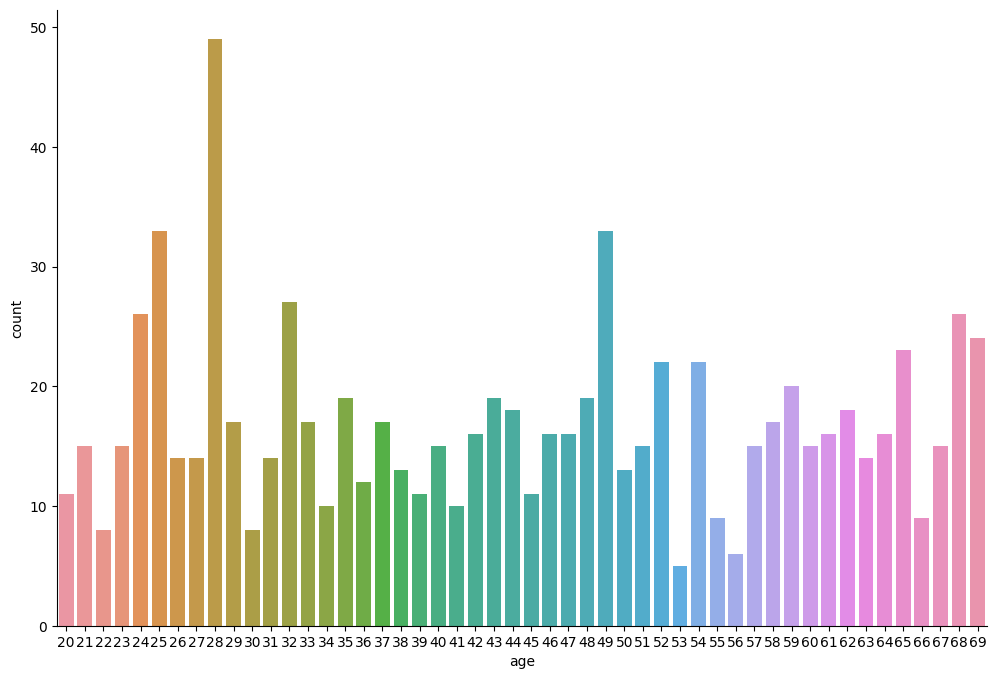

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=general_df.loc[(general_df.platform == 'computer')
                                   & (general_df.success == True)], 
             x='age')
sns.despine()